# <a id='toc1_'></a>[The Fiscal Policy in the New Keynesian model](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [The Fiscal Policy in the New Keynesian model](#toc1_)    
  - [Q1](#toc1_1_)    
  - [Q2](#toc1_2_)    
  - [Q3](#toc1_3_)    
  - [Q4](#toc1_4_)    
  - [Q5](#toc1_5_)    
  - [Q6](#toc1_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [59]:
%load_ext autoreload
%autoreload 2

import numpy as np
import RANKModel 
import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
model = RANKModel.NKModelClass(name='baseline')
model.find_ss()

In [61]:
model.test_path()

shocks: Z beta eps_i G 
unknowns: C P Y w 

look at max(abs(path.VARNAME[:]-ss.VARNAME)):

 blocks.NK_block
  i                0.0e+00
  pi               0.0e+00
  Euler            0.0e+00 [target]
  r                1.1e-16
  N                0.0e+00
  mc               0.0e+00
  goods_mkt        0.0e+00 [target]
  NKPC             0.0e+00 [target]
  Labor_supply     0.0e+00 [target]
  profits          0.0e+00
  LT               0.0e+00
  A                0.0e+00
  B                0.0e+00


## <a id='toc1_1_'></a>[Q1](#toc0_)

## <a id='toc1_2_'></a>[Q2](#toc0_)

In [ ]:
model.info()

settings:
 par.py_hh = True
 par.py_blocks = True
 par.full_z_trans = False
 par.warnings = True
 par.T = 300

households:
 grids_hh: []
 pols_hh: []
 inputs_hh: []
 inputs_hh_z: []
 outputs_hh: []
 intertemps_hh: []

aggregate:
 shocks: [Z,beta,eps_i,G]
 unknowns: [C,P,Y,w]
 targets: [NKPC,Euler,goods_mkt,Labor_supply]

blocks (inputs -> outputs):
 NK_block: [P,C,Y,Z,w,beta,eps_i,G] -> [i,pi,Euler,r,N,mc,goods_mkt,NKPC,Labor_supply,profits,LT,A,B]


In [ ]:
model.compute_jacs(do_print=True)

full Jacobians:
full Jacobian to unknowns computed in 0.2 secs [in evaluate_blocks(): 0.1 secs]
full Jacobian to shocks computed in 0.2 secs [in evaluate_blocks(): 0.1 secs]


P: terminal value is   1.00215614, but ss value is   1.00000000


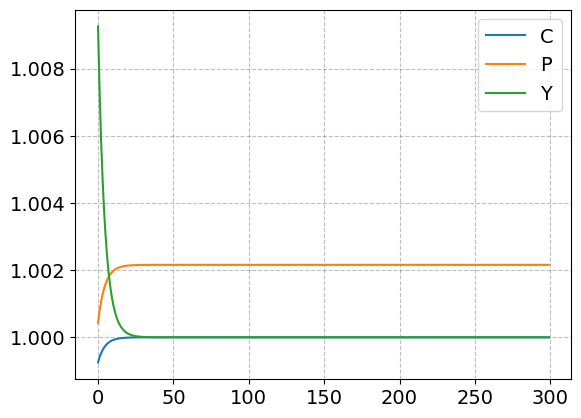

In [ ]:
shocks = ['G']

# dG = np.zeros(300)
# dG[:10] = .01
# shocks = {'dG': dG}
model.find_transition_path(shocks)

plt.plot(model.path.C, label='C')
plt.plot(model.path.P, label='P')
plt.plot(model.path.Y, label='Y')

plt.legend()

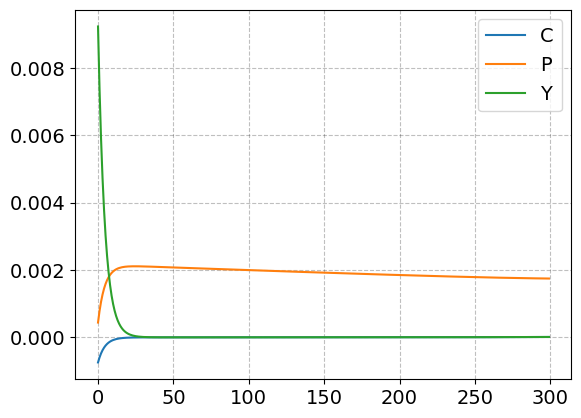

In [ ]:
model.find_IRFs(shocks)
plt.plot(model.IRF['C'], label='C')
plt.plot(model.IRF['P'], label='P')
plt.plot(model.IRF['Y'], label='Y')

plt.legend()

### shocks ###


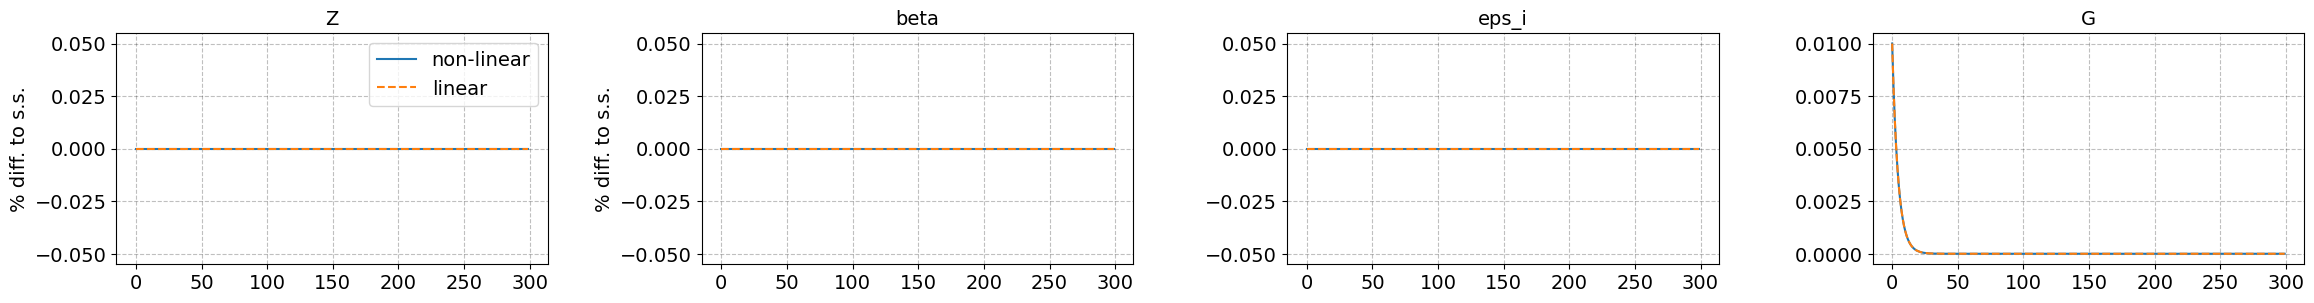


### varnames ###


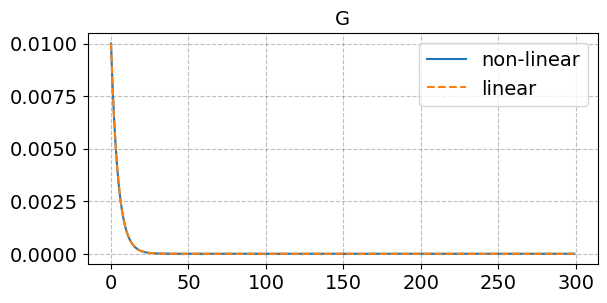


### tagets ###


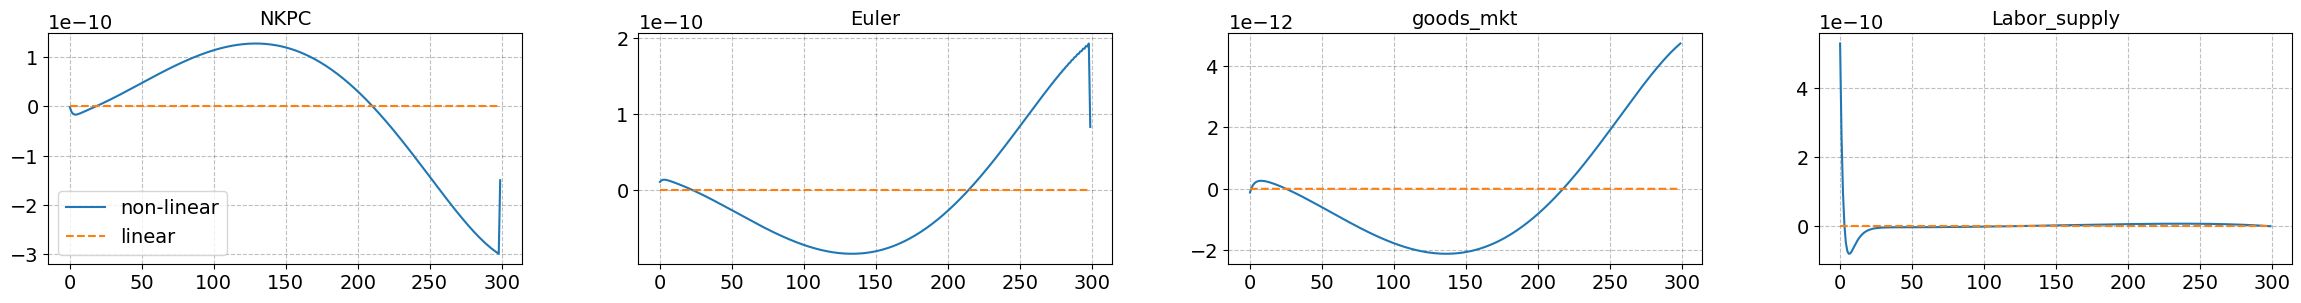

In [ ]:
model.show_IRFs(shocks, lvl_value=['G', 'eps_i'], do_linear=True)

## <a id='toc1_3_'></a>[Q3](#toc0_)

P: terminal value is   0.94912969, but ss value is   1.00000000
### shocks ###


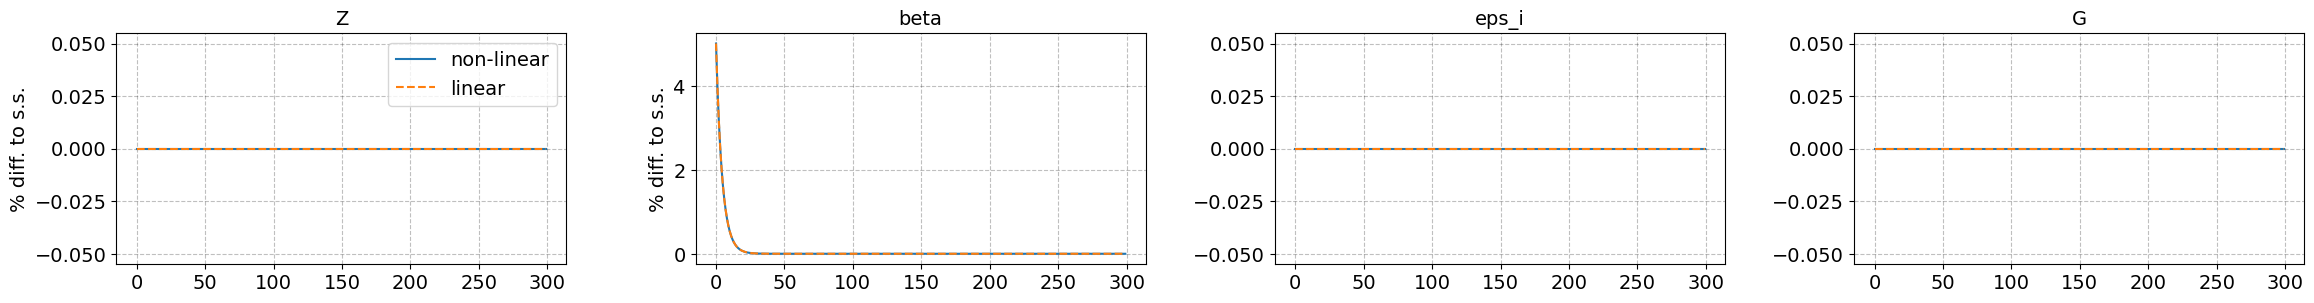


### varnames ###


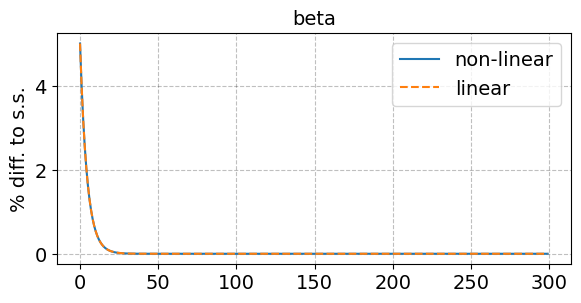


### tagets ###


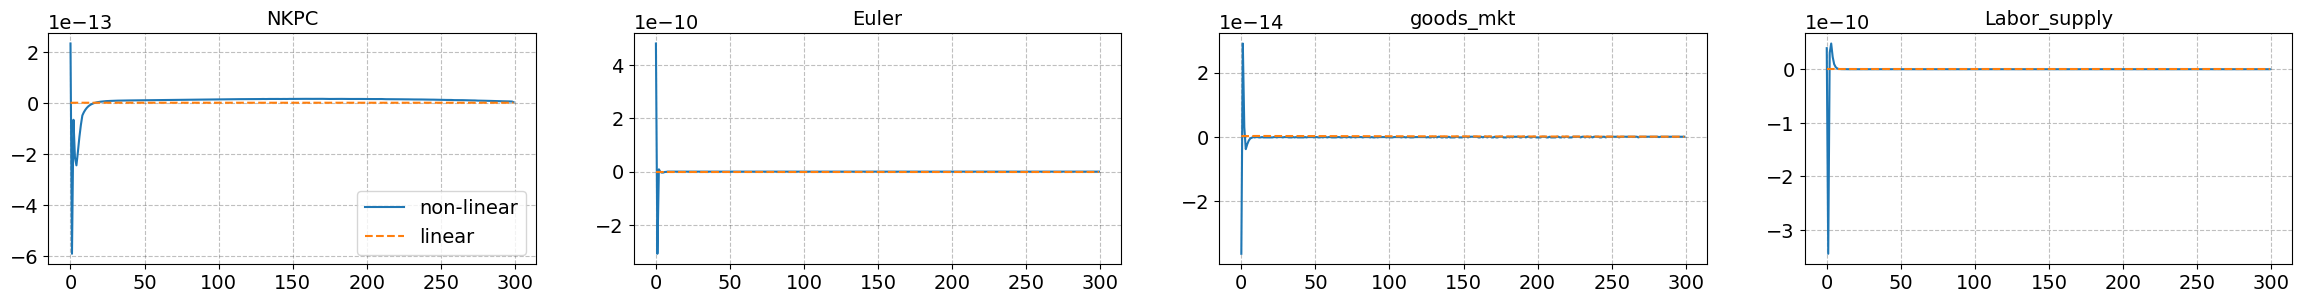

In [188]:
model_3 = RANKModel.NKModelClass(name='ZLB')
model_3.par.ZLB = True
model_3.find_ss()
model_3.compute_jacs()

shocks = ['beta']
model_3.par.jump_beta = 0.05
model_3.find_transition_path(shocks)
model_3.find_IRFs(shocks)
model_3.show_IRFs(shocks, lvl_value=['G', 'eps_i'], do_linear=True)

## <a id='toc1_4_'></a>[Q4](#toc0_)

P: terminal value is   0.95523885, but ss value is   1.00000000
### shocks ###


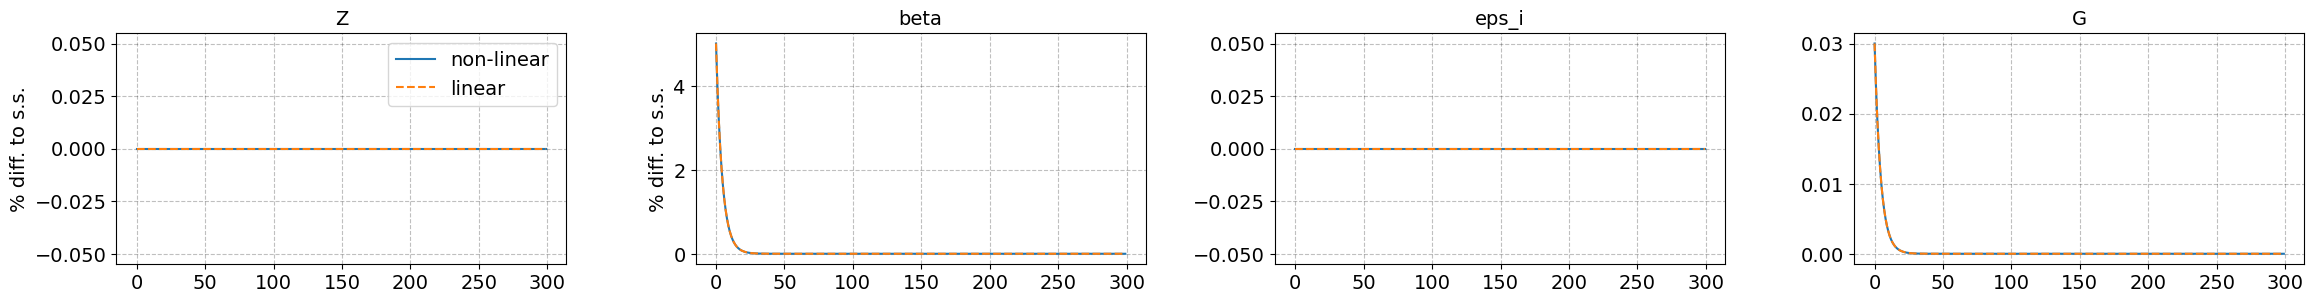


### varnames ###


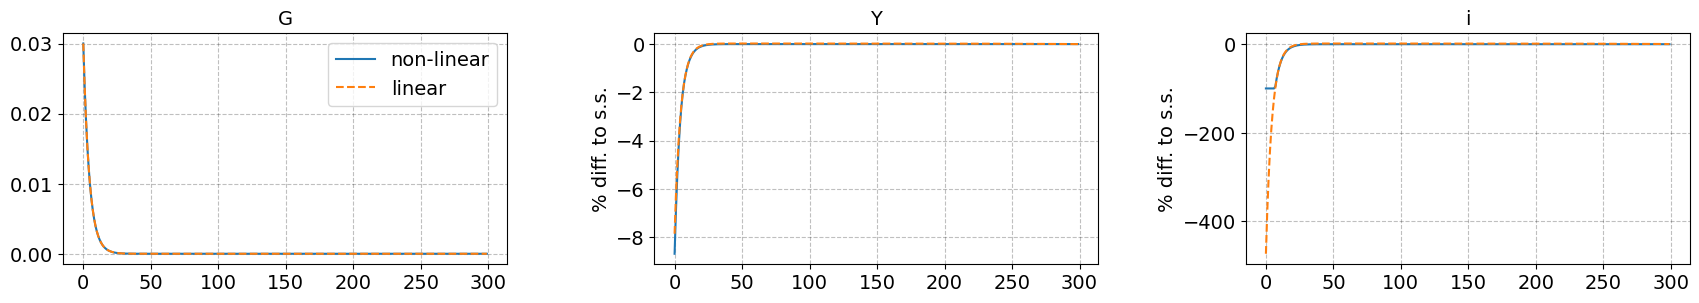


### tagets ###


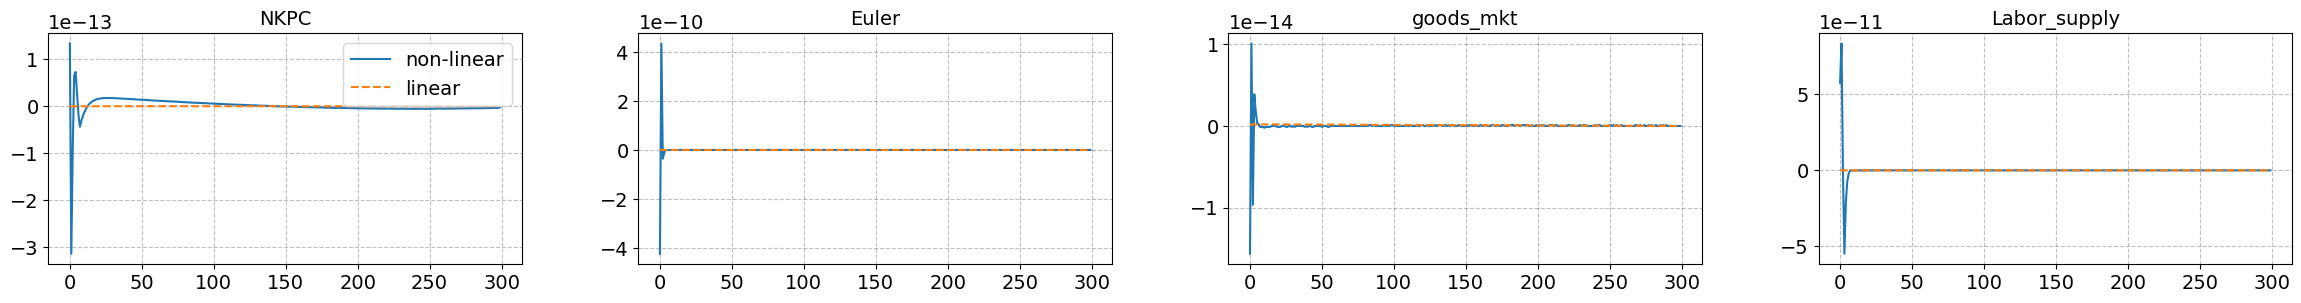

In [175]:
model4 = RANKModel.NKModelClass(name='4')
model4.par.ZLB = True
model4.find_ss()
model4.compute_jacs()

shocks = ['beta', 'G']
model4.par.jump_beta = 0.05
model4.par.jump_G = 0.03
model4.find_transition_path(shocks)
model4.find_IRFs(shocks)

paths = ['G', 'Y', 'i']
model4.show_IRFs(paths, lvl_value=['G', 'eps_i'], do_linear=True)

## <a id='toc1_5_'></a>[Q5](#toc0_)

## <a id='toc1_6_'></a>[Q6](#toc0_)

In [186]:
model6 = RANKModel.NKModelClass(name='6')
model6.par.ZLB = True
model6.find_ss()
model6.compute_jacs()

shocks = ['eps_i']
model6.par.jump_eps_i = 0.01
# model6.par.jump_G = 0.03
model6.find_transition_path(shocks)
model6.find_IRFs(shocks)

# paths = ['G', 'Y', 'i']
# model6.show_IRFs(paths, lvl_value=['G', 'eps_i'], do_linear=True)

dC = np.diff(model6.path.C, axis=0)
np.sum(dC ** 2)

P: terminal value is   0.98956712, but ss value is   1.00000000


4.896845996618746e-05

In [ ]:
model.IRF['d']

array([ 9.24116955e-03,  7.39064814e-03,  5.91023287e-03,  4.72590254e-03,
        3.77844014e-03,  3.02047209e-03,  2.41409953e-03,  1.92900335e-03,
        1.54092829e-03,  1.23047011e-03,  9.82105435e-04,  7.83415574e-04,
        6.24465560e-04,  4.97307425e-04,  3.95582793e-04,  3.14204964e-04,
        2.49104578e-04,  1.97026148e-04,  1.55365283e-04,  1.22038470e-04,
        9.53789010e-05,  7.40531268e-05,  5.69943898e-05,  4.33492835e-05,
        3.24350828e-05,  2.37056077e-05,  1.67239141e-05,  1.11404471e-05,
        6.67556242e-06,  3.10554504e-06,  2.51422848e-07, -2.02998176e-06,
       -3.85321080e-06, -5.30989783e-06, -6.47334961e-06, -7.40221150e-06,
       -8.14339972e-06, -8.73444717e-06, -9.20538008e-06, -9.58021940e-06,
       -9.87818179e-06, -1.01146405e-05, -1.03018941e-05, -1.04497812e-05,
       -1.05661729e-05, -1.06573657e-05, -1.07283970e-05, -1.07832963e-05,
       -1.08252874e-05, -1.08569491e-05, -1.08803444e-05, -1.08971235e-05,
       -1.09086068e-05, -

In [179]:
model6.simulate(skip_hh=True)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [182]:
np.mean(model6.sim.dC ** 2)

2.4474960620467005e-05